In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('logs/binary_pk.csv')
df.head(10)

,timestamp,ip_address,ip_address_country_alpha2,user_agent,session_id,trial_id,hit,raw_bits,rtd_ms,generator_id
0,2020-10-22T16:39:08.999426Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,88626782-9caf-4576-bf6e-4bf3e8fb2c1f,1,1101000100101111101100110110101010001001110111...,1,pseudorandom_2797e9c1
1,2020-10-22T16:39:09.276427Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,470437f5-3c5d-49b9-8dc6-83029f4a7b19,0,1011110000000101101101100101011111101110011101...,1,pseudorandom_2797e9c1
2,2020-10-22T16:39:09.489434Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,a88feb41-f211-4afd-911a-9883310cda5d,1,0011010010100000100111100011100101101100111000...,54,comscire_1bbc9b26
3,2020-10-22T16:39:09.776426Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,5316c2a9-b079-4712-a6df-abadadd77b8f,1,0001010011111101101110101110011110110111000011...,54,comscire_1bbc9b26
4,2020-10-22T16:39:10.044426Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,e60f22bf-e918-4ae0-a1b6-fd0037b8e50d,1,1000110111100101101101011001001000001001101011...,1,pseudorandom_2797e9c1
5,2020-10-22T16:39:10.323426Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,4c497f68-55fb-4261-b857-ceac3e9f6d92,0,0000100100010010110101010111000010001110110010...,1,pseudorandom_2797e9c1
6,2020-10-22T16:39:10.589428Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,72a6a345-e079-45d0-8911-6d03ad567140,1,1101100001000101010100100111111111000010001110...,1,pseudorandom_2797e9c1
7,2020-10-22T16:39:10.862425Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,a43ccd8d-fc02-4ddd-8423-6b21d666785f,0,0100010000000001100110101100010000001111000101...,49,comscire_1bbc9b26
8,2020-10-22T16:39:11.120425Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,910e0c0e-2c52-42fc-92b7-7a7a0a2d3c30,1,0000111001100001111101011100101110011100111011...,1,pseudorandom_2797e9c1
9,2020-10-22T16:39:11.366425Z,127.0.0.1,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1a553261-bff6-4fb4-aa3d-bf05316468bb,df482f4e-afa0-4ed0-a117-49c2eedcb68f,1,0110110001010000000111001001000001100101010101...,1,pseudorandom_2797e9c1


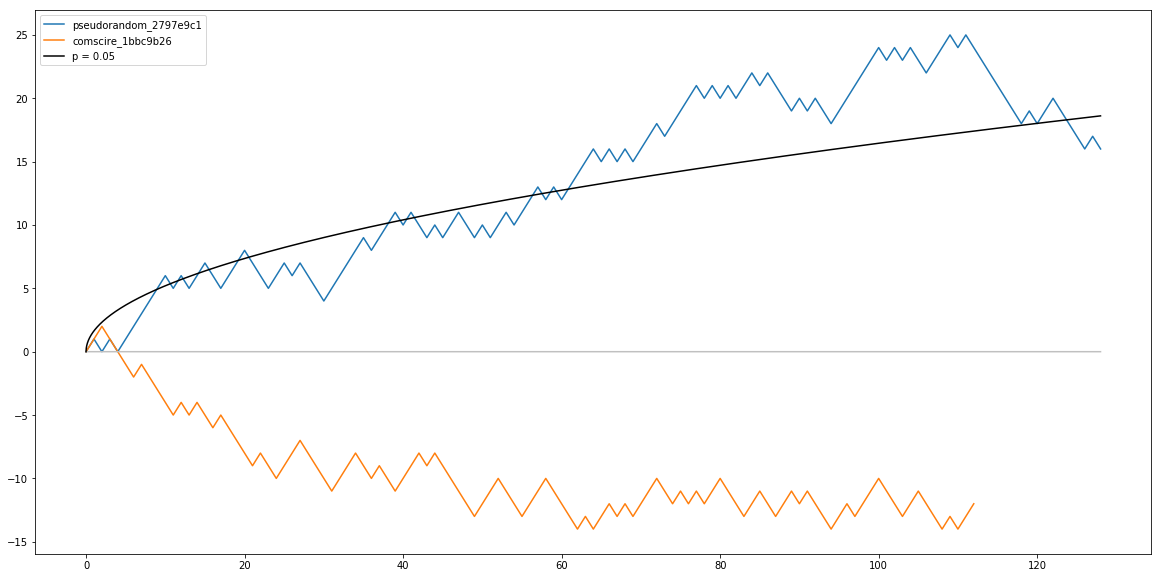

In [3]:
generator_ids = df['generator_id'].unique()

plt.rcParams['figure.figsize'] = [20, 10]

max_trial_count = 0
for generator_id in generator_ids:
    generator_df = df[df['generator_id'] == generator_id]
    cumdev = [0]
    for hit in df[df['generator_id'] == generator_id]['hit']:
        cumdev.append(cumdev[-1] + (1 if hit == 1 else -1))
    plt.plot(cumdev, label=generator_id)
    max_trial_count = max(max_trial_count, len(cumdev))

trial_count_per_generator = len(df[df['generator_id'] == generator_ids[0]])
plt.plot(np.arange(0, trial_count_per_generator, 0.01), 0 * np.arange(0, trial_count_per_generator, 0.01), color='silver')
plt.plot(np.arange(0, trial_count_per_generator, 0.01), 1.645 * np.sqrt(np.arange(0, trial_count_per_generator, 0.01)), color='black', label='p = 0.05')

plt.legend(loc='upper left')